<a href="https://colab.research.google.com/github/T-Naveen-2308/IITM-MLT-Assignments/blob/main/W3_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-3

## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)

N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))

## Problem 1
How many samples are there in the dataset?



## Solution

In [ ]:
print(X.shape[0])

1998


## Problem 2

How many features are there in the dataset?


## Solution

In [ ]:
print(X.shape[1])

2


## Problem 3
Plot the dataset using matplotlib.



## Solution

<ipython-input-19-5e38e25c38ab>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


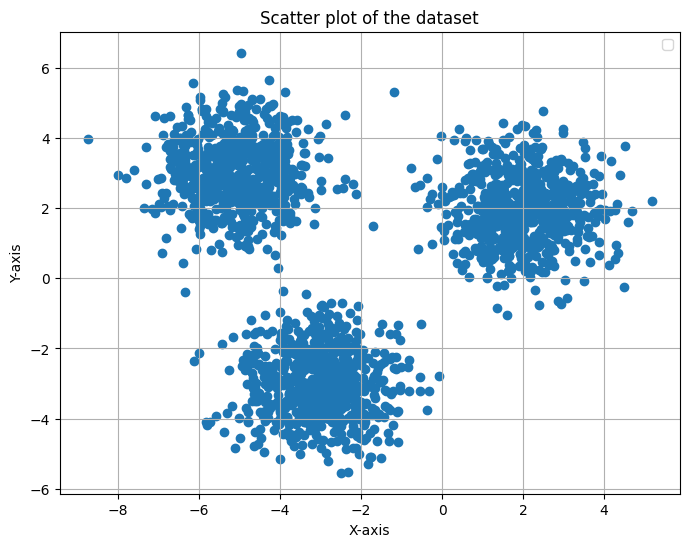

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1])

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter plot of the dataset')
plt.legend()
plt.grid(True)
plt.show()

## Problem 4

Write a function `assign_clusters(X, k, cluster_centers)` that assigns a cluster to each data point as per their distance from each cluster centre and returns a vector `z`, where $z[i] \in \{0, 1, 2\}$.

What is the mean of the values in vector `z`? Provide the answer correct up to three decimal places.



## Solution

In [ ]:
def assign_clusters(X, k, cluster_centers):
    z = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        distances = np.linalg.norm(X[i] - cluster_centers, axis=1)
        z[i] = np.argmin(distances)
    return z

## Instruction

Assume k = 3. Take the data points with indices 200, 800 and 1200 in X to be the initial cluster centers.


In [ ]:
z = assign_clusters(X, 3, [X[200], X[800], X[1200]])
print(z.mean())

0.7107107107107107


## Problem 5

Plot the data points, with different color for different clusters.


## Solution

<ipython-input-10-a9cf28477666>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


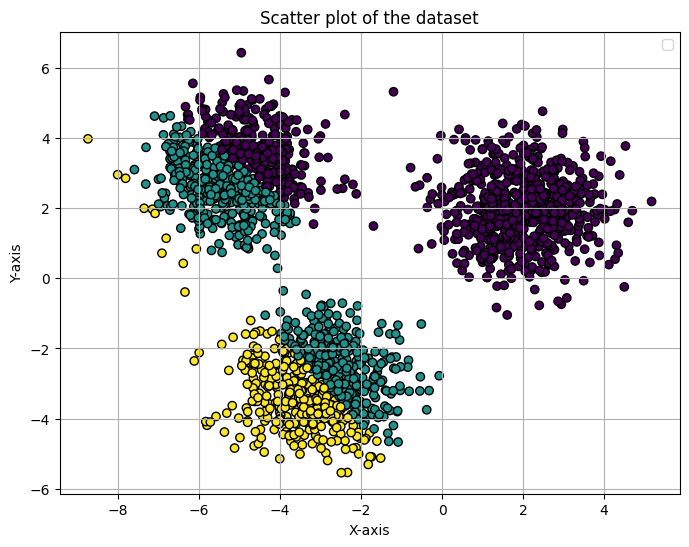

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=z, cmap='viridis', edgecolors='k')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter plot of the dataset')
plt.legend()
plt.grid(True)
plt.show()

## Problem 6
Write a function `compute_cluster_centers(X, z, k)` that computes the clusters' centers as per z and returns `k` new cluster centers.

What is the mean of the three cluster centers? Provide the $x_1$ and $y_1$ component. Provide both components correct up to three decimal places.



## Solution

In [ ]:
def compute_cluster_centers(X, z, k):
    cluster_centers = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster_points = X[z == i]
        cluster_centers[i] = np.mean(cluster_points, axis=0)
    return cluster_centers

In [ ]:
cluster_centers = compute_cluster_centers(X, z, 3)

print(cluster_centers.mean(axis=0))

[-2.55251646 -0.19225194]


## Extra

Keep executing the code in problems 4, 5 and 6 (for, say, 10 iterations) to observe how the clusters change across different iterations.

## Solution

<ipython-input-14-866d1c6e467a>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


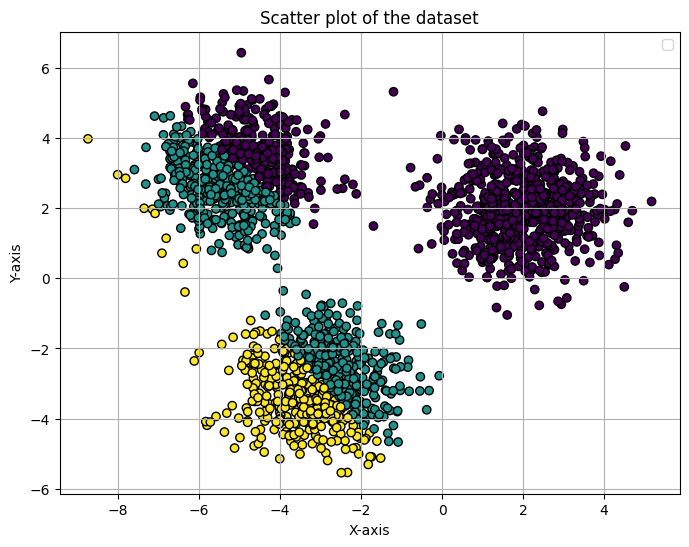

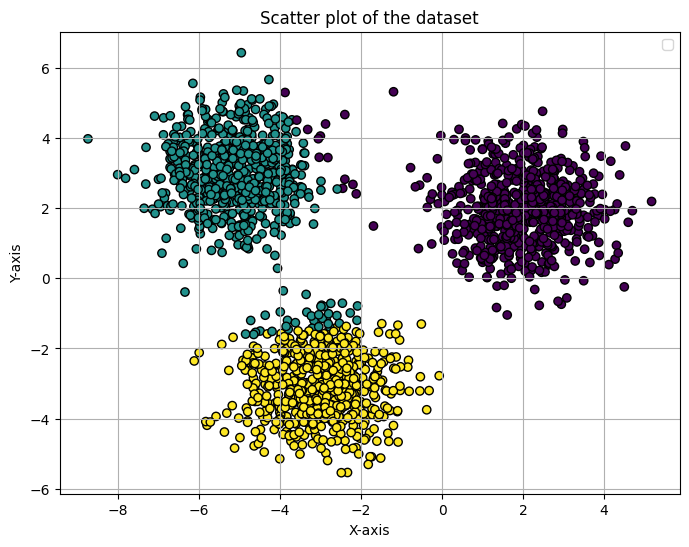

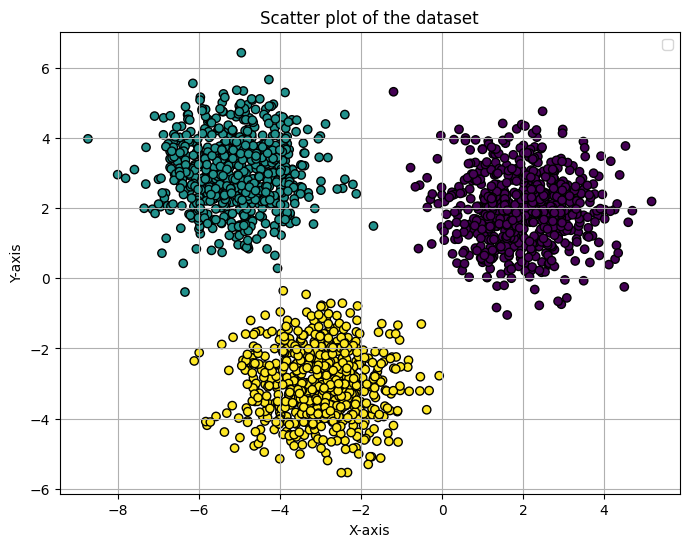

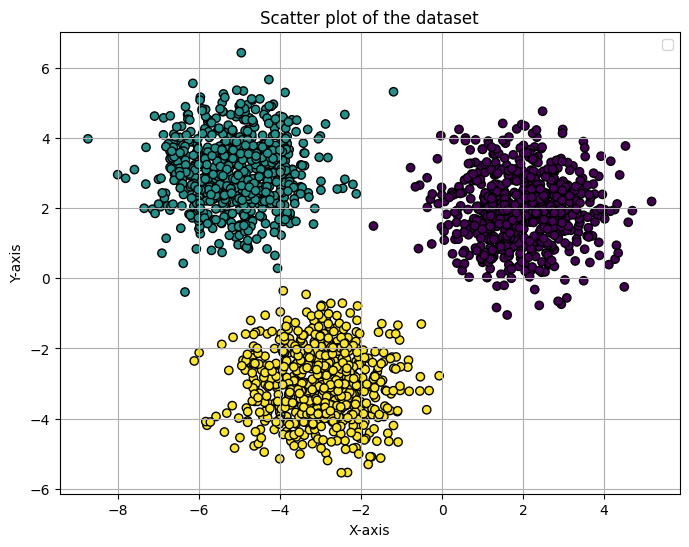

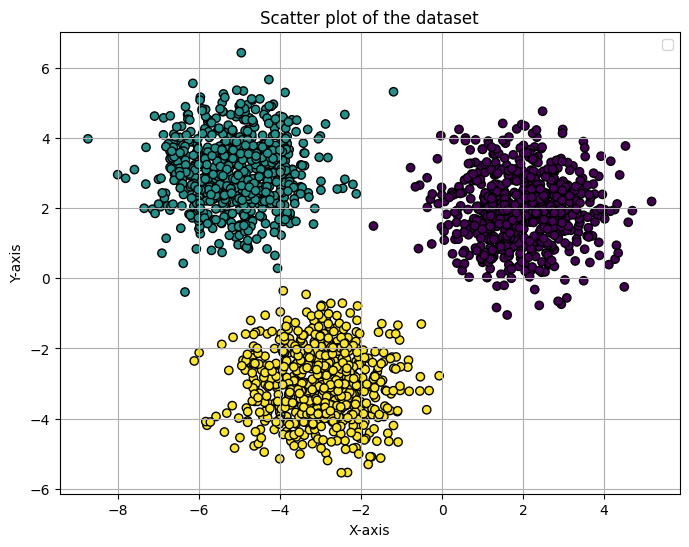

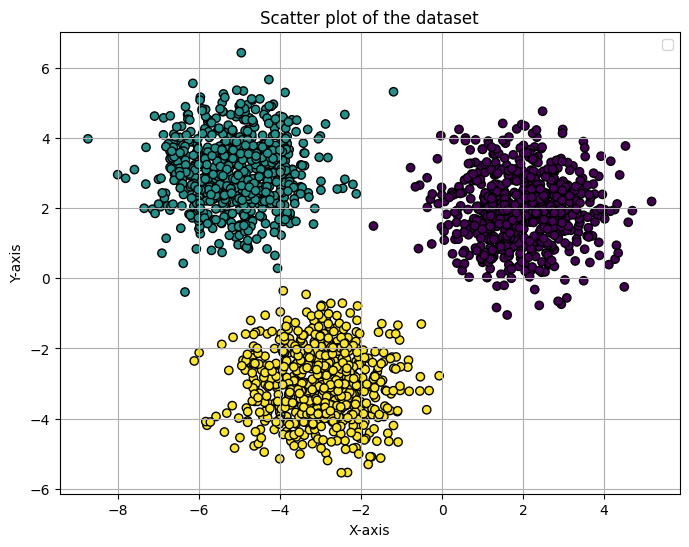

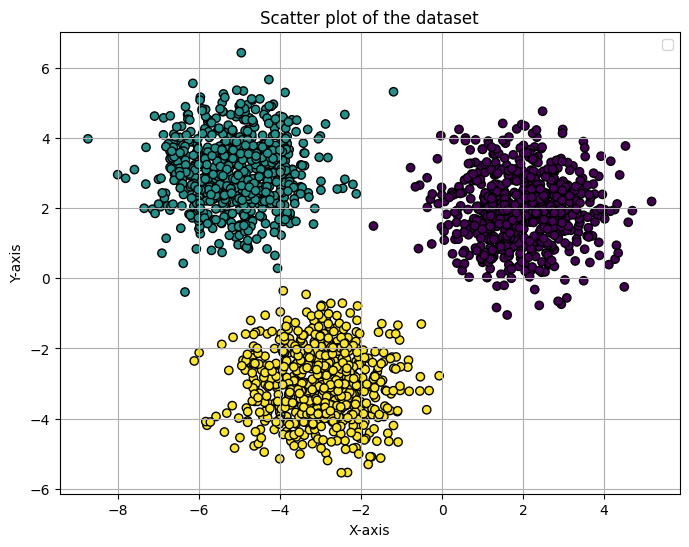

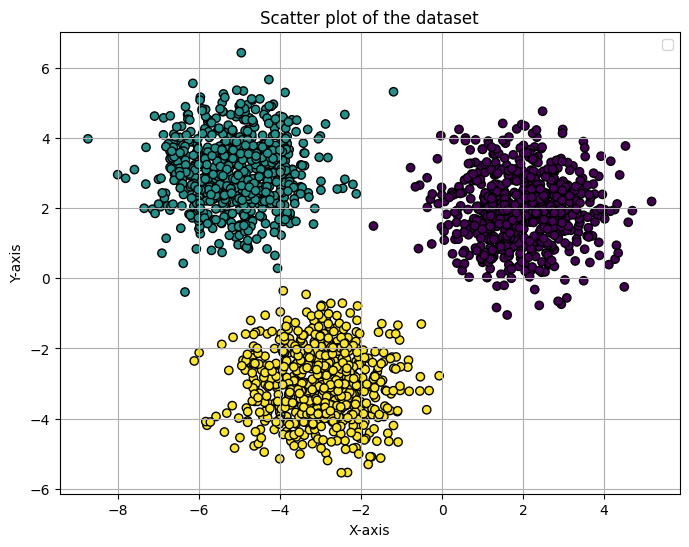

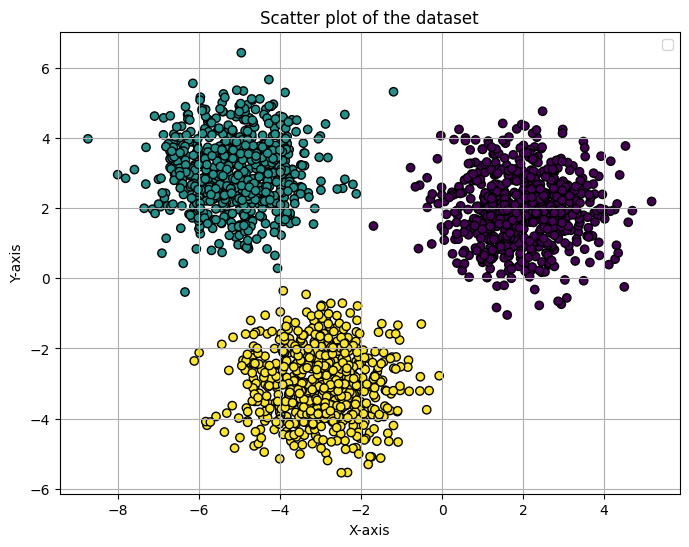

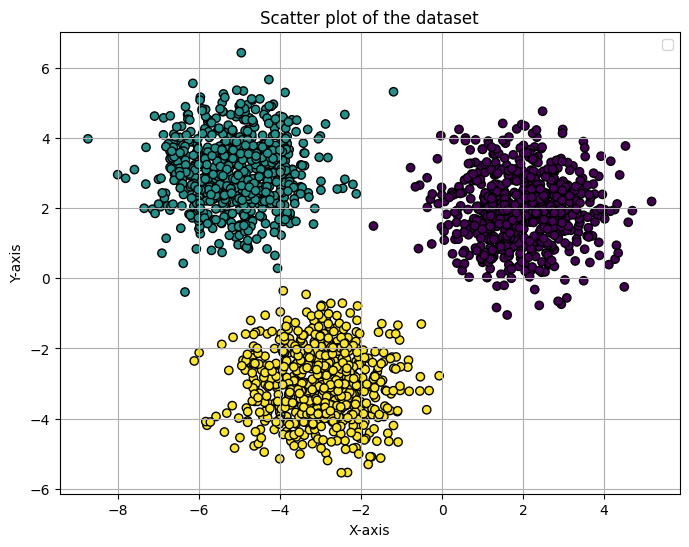

In [ ]:
cluster_centers = [X[200], X[800], X[1200]]

for i in range(10):
  z = assign_clusters(X, 3, cluster_centers)
  plt.figure(figsize=(8, 6))
  plt.scatter(X[:, 0], X[:, 1], c=z, cmap='viridis', edgecolors='k')

  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.title('Scatter plot of the dataset')
  plt.legend()
  plt.grid(True)
  plt.show()

  cluster_centers = compute_cluster_centers(X, z, 3)